In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_the_graph(winner):
    list_of_nodes = []
    for node in winner.connections.values():
        temp = []
        for neuron in node.key:
            temp.append(neuron)
        temp.append(node.weight)
        list_of_nodes.append(temp)
    
    unique_nodes = []
    for node in list_of_nodes:
        if node[0] not in unique_nodes:
            unique_nodes.append(node[0])
        if node[1] not in unique_nodes:
            unique_nodes.append(node[1])
    
    G = nx.DiGraph()
    i_neg = 0
    i_pos = 0
    for node in unique_nodes:
        if node > 0:
            G.add_node(node, pos=(1, i_pos ))
            i_pos += 2
        elif node < 0:
            G.add_node(node, pos=(0, i_neg))
            i_neg += 2
        else:
            G.add_node(node, pos=(2, 5))

    for node in list_of_nodes:
        G.add_edge(node[0], node[1], weight=node[2])

    # positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')

    # color the arrows
    edge_colors = ['r' if G[u][v]['weight'] < 0 else 'g' for u,v in G.edges()]
    # green for input nodes, yellow for hidden nodes, red for output nodes
    node_colors = ['gray' if node < 0 else 'y' if node > 0 else 'pink' for node in G.nodes()]

    # add legend to plot
    red_patch = mpatches.Patch(color='red', label='Negative weights')
    green_patch = mpatches.Patch(color='green', label='Positive weights')
    gray_patch = mpatches.Patch(color='gray', label='Input nodes')
    yellow_patch = mpatches.Patch(color='yellow', label='Hidden nodes')
    pink_patch = mpatches.Patch(color='pink', label='Output nodes')

    plt.legend(handles=[red_patch, green_patch, gray_patch, yellow_patch, pink_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # weights of the edges
    weights = nx.get_edge_attributes(G, 'weight')
    # draw the graph
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=500, arrows=True)
    # draw the weights
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.show()

In [8]:
def calculate_metrics(winner_net, inputs, outputs):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for xi, xo in zip(inputs, outputs):
        output = winner_net.activate(xi)
        output = 1 if output[0] > 0.5 else 0
        #print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))    
        if output == 1 and xo == 1:
            TP += 1
        elif output == 0 and xo == 0:
            TN += 1
        elif output == 1 and xo == 0:
            FP += 1
        elif output == 0 and xo == 1:
            FN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    IoU = TP / (TP + FP + FN)

    print("TP: ", TP)
    print("TN: ", TN)
    print("FP: ", FP)
    print("FN: ", FN)
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("IoU: ", IoU)

In [9]:
import pandas as pd
import neat
import my_visualize as visualize
import numpy as np

dataset = pd.read_csv('diabetes.csv', header=None, sep=',', engine='python')
dataset = dataset.drop([0])
dataset = dataset.astype(float)

inputs = dataset.iloc[:, 0:8].values
outputs = dataset.iloc[:, 8].values


----------------------------------------

In [10]:
inputs = np.array(inputs)
outputs = np.array(outputs)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            #use threshold
            output = 1 if output[0] > 0.5 else 0
            genome.fitness -= (output - xo) ** 2

In [11]:
config_path = 'A:/Профиль/Rab Table/Учёба/2/Neuroevolutionary-computing/Код/180523/4/config-diabetis'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)
p = neat.Population(config)
# Add a stdout reporter to show progress in the terminal.
#p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
#p.add_reporter(neat.Checkpointer(5))

In [12]:
winner = p.run(eval_genomes, 300)

Best genome:
Key: 5003
Fitness: 545.0
Nodes:
	0 DefaultNodeGene(key=0, bias=1.4260814448668568, response=1.0, activation=sigmoid, aggregation=sum)
	137 DefaultNodeGene(key=137, bias=0.5821191471318623, response=1.0, activation=sigmoid, aggregation=sum)
	138 DefaultNodeGene(key=138, bias=-0.6124402071090727, response=1.0, activation=sigmoid, aggregation=sum)
	139 DefaultNodeGene(key=139, bias=-1.555612099114168, response=1.0, activation=sigmoid, aggregation=sum)
	375 DefaultNodeGene(key=375, bias=0.23074235732471626, response=1.0, activation=sigmoid, aggregation=sum)
	838 DefaultNodeGene(key=838, bias=0.32981321854005674, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-8, 137), weight=-0.001585637059414391, enabled=True)
	DefaultConnectionGene(key=(-8, 138), weight=-0.22651582408193516, enabled=True)
	DefaultConnectionGene(key=(-8, 139), weight=0.735753967022072, enabled=True)
	DefaultConnectionGene(key=(-7, 137), weight=1.6366541919222732, e

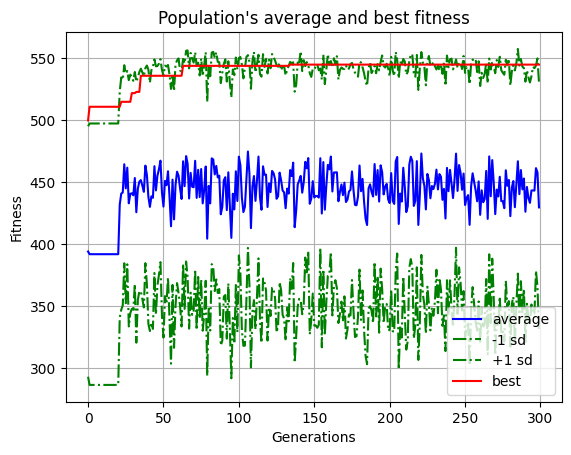

In [13]:
# Display the winning genome.
print('Best genome:\n{!s}'.format(winner))

winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
calculate_metrics(winner_net, inputs, outputs)

#visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)

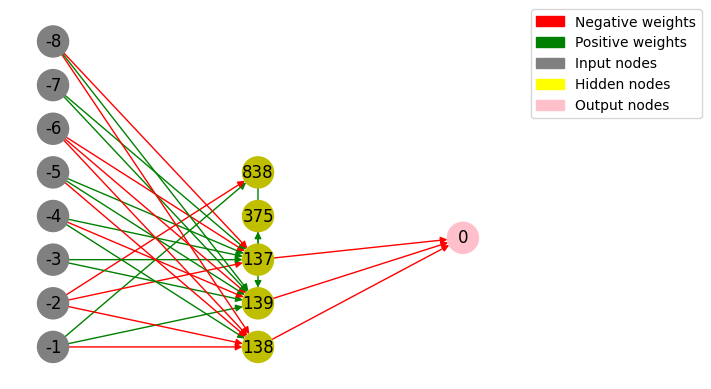

In [15]:
plot_the_graph(winner)

In [ ]:
node_names = {-1: 'Pregnancies',
              -2: 'Glucose',
              -3: 'BloodPressure',
              -4: 'SkinThickness',
              -5: 'Insulin',
              -6: 'BMI',
              -7: 'DiabetesPedigreeFunction',
              -8: 'Age',
              0: 'Outcome'}

-------------------

# Debug

In [97]:
list_of_nodes = []
for node in winner.connections.values():
    temp = []
    for neuron in node.key:
        temp.append(neuron)
    temp.append(node.weight)
    list_of_nodes.append(temp)

print(list_of_nodes)


[[-1, 85, -1.7071222621336568], [-1, 86, 0.17957592769801145], [-1, 87, -0.29894205686274], [-2, 85, -2.870526340163048], [-2, 86, 0.35266672938803445], [-2, 87, 0.8135413867716283], [-2, 88, 0.6808470376846167], [-3, 85, 7.331728169709643], [-3, 86, 0.12219002783479216], [-3, 87, -1.64793424201519], [-4, 85, 2.262747608741112], [-4, 87, -0.2002554306887941], [-5, 85, -0.6694683554786169], [-5, 86, -0.6828414179696445], [-5, 87, 1.7390513190833676], [-5, 88, -3.0141406568759663], [-6, 85, 0.022941385835381967], [-6, 86, -1.2612385611478039], [-6, 87, 0.9785951892973335], [-6, 88, 1.2124389650099479], [-7, 85, 0.17457251194109813], [-7, 86, -0.810144127210184], [-7, 87, -0.256769690357873], [-8, 85, -4.232012527083154], [-8, 88, -0.5998349579815943], [85, 0, -6.177320764419388], [86, 0, 1.4633061577533872], [87, 0, 2.32513538930648], [88, 0, -0.7761566802339845], [87, 85, -2.40371586197377], [88, 87, 2.469994445710779]]


In [113]:
for node in list_of_nodes:
    if node[0] > 0 and node[1] > 0:
        # pop the node
        print(node)
        list_of_nodes.remove(node)

[88, 87, 2.469994445710779]


In [114]:
print(list_of_nodes)


[[-1, 85, -1.7071222621336568], [-1, 86, 0.17957592769801145], [-1, 87, -0.29894205686274], [-2, 85, -2.870526340163048], [-2, 86, 0.35266672938803445], [-2, 87, 0.8135413867716283], [-2, 88, 0.6808470376846167], [-3, 85, 7.331728169709643], [-3, 86, 0.12219002783479216], [-3, 87, -1.64793424201519], [-4, 85, 2.262747608741112], [-4, 87, -0.2002554306887941], [-5, 85, -0.6694683554786169], [-5, 86, -0.6828414179696445], [-5, 87, 1.7390513190833676], [-5, 88, -3.0141406568759663], [-6, 85, 0.022941385835381967], [-6, 86, -1.2612385611478039], [-6, 87, 0.9785951892973335], [-6, 88, 1.2124389650099479], [-7, 85, 0.17457251194109813], [-7, 86, -0.810144127210184], [-7, 87, -0.256769690357873], [-8, 85, -4.232012527083154], [-8, 88, -0.5998349579815943], [85, 0, -6.177320764419388], [86, 0, 1.4633061577533872], [87, 0, 2.32513538930648], [88, 0, -0.7761566802339845]]


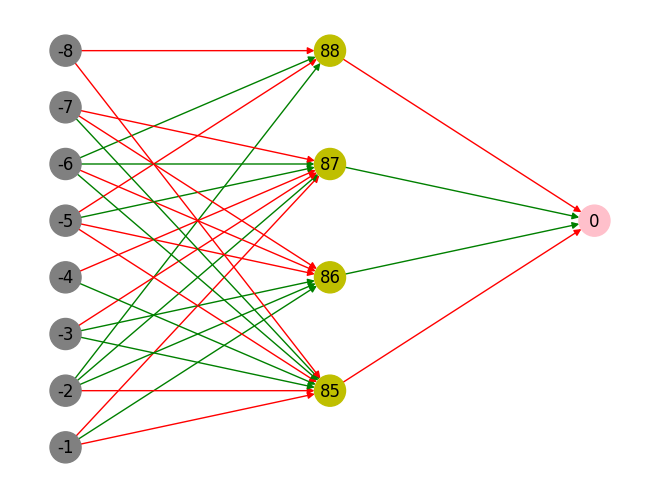

In [129]:
#plot a graph where the first element of inner list is the first node, the second element is the second node and the third element is the weight of the connection
# the plot must show three levels of neural network. 
# If the node is 0 - it is output. If the node is 85-88 - it is hidden. If the node is -8 - -1- it is input
# the plot must show the connections between the nodes
# the plot must show the weights of the connections

#plot a graph where the first element of inner list is the first node, the second element is the second node and the third element is the weight of the connection

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
# upper level nodes (input) - 8 nodes
#i = 0
#for node in list_of_nodes:
#    G.add_node(node[0], pos=(0, i))
#    if(node[1] > 0):
#        G.add_node(node[1], pos=(1, (1+i)*2))
#    elif(node[1] == 0):
#        G.add_node(node[1], pos=(2, (1+i)*2))
#    G.add_edge(node[0], node[1], weight=node[2])
#    i += 1

G.add_node(-1, pos=(0, 0))
G.add_node(-2, pos=(0, 1))
G.add_node(-3, pos=(0, 2))
G.add_node(-4, pos=(0, 3))
G.add_node(-5, pos=(0, 4))
G.add_node(-6, pos=(0, 5))
G.add_node(-7, pos=(0, 6))
G.add_node(-8, pos=(0, 7))
# middle level nodes (hidden) - 4 nodes
G.add_node(85, pos=(1, 1))
G.add_node(86, pos=(1, 3))
G.add_node(87, pos=(1, 5))
G.add_node(88, pos=(1, 7))
# lower level nodes (output) - 1 node
G.add_node(0, pos=(2, 4))

# edges between nodes
for node in list_of_nodes:
    G.add_edge(node[0], node[1], weight=node[2])


## weights of the edges
#G.edges[-1, 85]['weight'] = list_of_nodes[0][2]
#G.edges[-1, 86]['weight'] = list_of_nodes[1][2]

# positions of the nodes
pos = nx.get_node_attributes(G, 'pos')

# color the arrows
edge_colors = ['r' if G[u][v]['weight'] < 0 else 'g' for u,v in G.edges()]
# green for input nodes, yellow for hidden nodes, red for output nodes
node_colors = ['gray' if node < 0 else 'y' if node > 0 else 'pink' for node in G.nodes()]

# weights of the edges
weights = nx.get_edge_attributes(G, 'weight')
# draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, node_size=500, arrows=True)
# draw the weights
#nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
plt.show()



In [82]:
print(type(winner.connections))
for a, b in winner.connections:
    print(a, b)

<class 'dict'>
-1 85
-1 86
-1 87
-2 85
-2 86
-2 87
-2 88
-3 85
-3 86
-3 87
-4 85
-4 87
-5 85
-5 86
-5 87
-5 88
-6 85
-6 86
-6 87
-6 88
-7 85
-7 86
-7 87
-8 85
-8 88
85 0
86 0
87 0
88 0
87 85
88 87


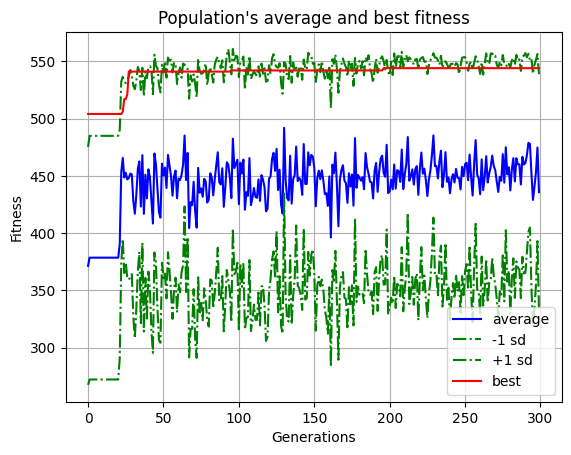

In [76]:
visualize.plot_stats(stats, ylog=False, view=True)

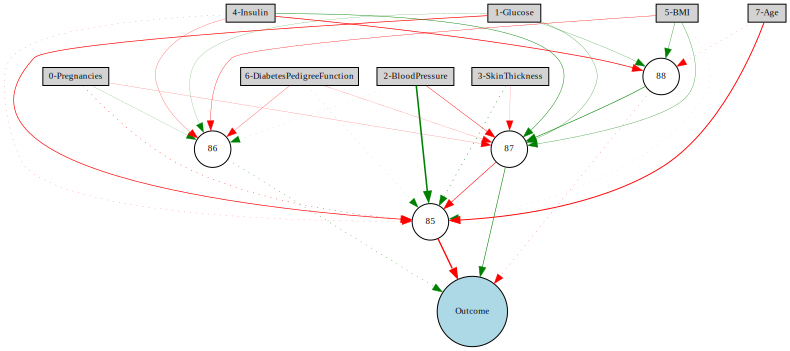

In [77]:
visualize.draw_net(config, winner, True, node_names=node_names)